## Playoff Performers Project Part 3 - Regressions

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
combined = pd.read_csv("C:/Users/kevin/Downloads/combined 2019-2023 v2.csv")
best_players = pd.read_csv("C:/Users/kevin/Downloads/best players combined 2019-2023 v2.csv")

In [3]:
best_players = pd.get_dummies(best_players,columns=['Pos_x'],drop_first=True)
combined = pd.get_dummies(combined,columns=['Pos_x'],drop_first=True)

In [6]:
combined.columns

Index(['Player', 'Age_x', 'Tm_x', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year',
       'SeasonType_x', 'MPG', 'G_p', 'MP_p', 'PER_p', 'TS%_p', '3PAr_p',
       'FTr_p', 'ORB%_p', 'DRB%_p', 'TRB%_p', 'AST%_p', 'STL%_p', 'BLK%_p',
       'TOV%_p', 'USG%_p', 'OWS_p', 'DWS_p', 'WS_p', 'WS/48_p', 'OBPM_p',
       'DBPM_p', 'BPM_p', 'VORP_p', 'SeasonType_y', 'MPG_p', 'PER_diff',
       'VORP_diff', 'WS/48_diff', 'Pos_x_PF', 'Pos_x_PG', 'Pos_x_SF',
       'Pos_x_SG'],
      dtype='object')

In [7]:
X = combined[['Age_x', 'G', 'MP', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS/48', 'MPG', 'Pos_x_PF', 'Pos_x_PG', 'Pos_x_SF',
       'Pos_x_SG']]

y = combined['WS/48_diff']

### Linear Regression

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
# Create an instance of the Linear regression model
lm = LinearRegression()

# Fit the linear model on the training data
lm.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
lm_coefs = lm.coef_
feature_names = X_train.columns

# Create a DataFrame to store the coefficients and feature names
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lm_coefs})

# Sort the DataFrame by absolute coefficient values
coefs_df['Absolute Coefficient'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the feature importance
print(coefs_df)

     Feature  Coefficient  Absolute Coefficient
0        TS%    -0.156775              0.156775
1      WS/48    -0.114715              0.114715
2        FTr    -0.047800              0.047800
3       3PAr    -0.036137              0.036137
4       STL%     0.007894              0.007894
5   Pos_x_PF    -0.005769              0.005769
6       BLK%     0.005686              0.005686
7   Pos_x_SF    -0.004875              0.004875
8       TOV%     0.002646              0.002646
9   Pos_x_SG    -0.002405              0.002405
10      ORB%    -0.002032              0.002032
11       MPG     0.002025              0.002025
12      AST%    -0.001152              0.001152
13       DWS    -0.001010              0.001010
14  Pos_x_PG     0.000877              0.000877
15     Age_x     0.000739              0.000739
16      USG%    -0.000628              0.000628
17         G     0.000538              0.000538
18      DRB%    -0.000333              0.000333
19       OWS     0.000151              0

The above table shows the size of the impact of the features not the statistical significance. Assuming they were statistically significant, TS% seems to be a large impact predictor of the change in WS/48 from regular season to playoffs. This is saying a higher true shooting percentage leads to a lower WS/48 difference. This could be due to tougher defense and finesse players who deliver strong efficiency in the regular season can't keep their value the same (remember that bigs had worse differences and they are more likely to have higher TS%.

In [ ]:
predictions = lm.predict(X_test)

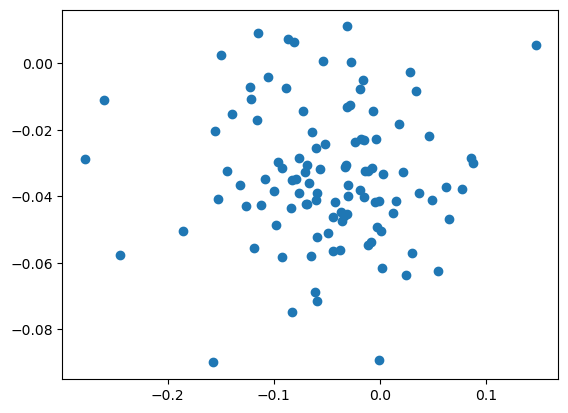

In [17]:
plt.scatter(y_test,predictions)

C:\Users\kevin\AppData\Local\Temp\ipykernel_13868\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='WS/48_diff', ylabel='Density'>

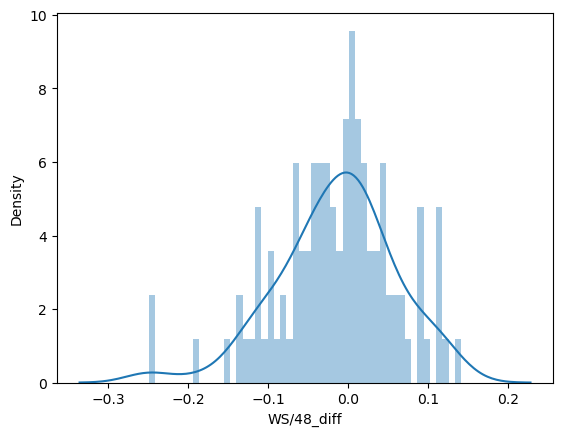

In [18]:
sns.distplot((y_test-predictions),bins=50)

In [19]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared: ', metrics.explained_variance_score(y_test, predictions))
print('R: ', np.sqrt(metrics.explained_variance_score(y_test, predictions)))

MAE: 0.05630149351004044
MSE: 0.005569889353391138
RMSE: 0.07463169134751763
R-squared:  -0.09831903018039134
R:  nan


C:\Users\kevin\AppData\Local\Temp\ipykernel_13868\2231143017.py:5: RuntimeWarning: invalid value encountered in sqrt
  print('R: ', np.sqrt(metrics.explained_variance_score(y_test, predictions)))


This initial model has a negative R squared, meaning it tells us basically nothing.

In [23]:
import statsmodels.api as sm
results = sm.OLS(y_train,X_train).fit()
p_value = results.pvalues[X.columns]

In [24]:
p_value.sort_values()

BLK%        0.095489
TOV%        0.147681
AST%        0.219835
3PAr        0.226189
FTr         0.245319
STL%        0.302525
MPG         0.317239
TS%         0.326554
Age_x       0.342061
MP          0.382561
ORB%        0.396773
G           0.454852
USG%        0.515396
WS/48       0.615471
Pos_x_PF    0.749288
DRB%        0.763837
Pos_x_SF    0.833450
Pos_x_PG    0.907031
DWS         0.946509
Pos_x_SG    0.954687
OWS         0.966409
dtype: float64

As you can see, this model has too much noise. The R-squared is not interpretable and none of the individual coefficients are statistically significant by an alpha level of 0.05.

### Feature Selection

Because the initial linear regression was not interpretable, I tried a function for feature selection through backward elimination to narrow down our predictors to a few high relevance features.

In [25]:
def backward_elimination(X, y, significance_level=0.05):
    num_features = X.shape[1]
    for i in range(num_features):
        X = sm.add_constant(X)  # Add constant column for intercept
        model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
        max_p_value = model.pvalues[1:].max()  # Exclude the constant column
        if max_p_value > significance_level:
            feature_to_remove = model.pvalues[1:].idxmax()
            X = X.drop(feature_to_remove, axis=1)  # Remove the feature with the highest p-value
        else:
            break
    return model

# Perform backward elimination to select features
selected_model = backward_elimination(X, y)

# Print the summary of the selected model
print(selected_model.summary())

                            OLS Regression Results                            
Dep. Variable:             WS/48_diff   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     9.359
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.59e-07
Time:                        19:37:43   Log-Likelihood:                 694.44
No. Observations:                 532   AIC:                            -1379.
Df Residuals:                     527   BIC:                            -1358.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0918      0.041      2.242      0.0

### ChatGPT explanation of the output

**R-squared and Adj. R-squared:** These coefficients indicate the goodness-of-fit of the model. In this case, the R-squared value is 0.066, meaning that approximately 6.6% of the variation in the dependent variable (WS/48_diff) is explained by the selected independent variables. The adjusted R-squared takes into account the number of predictors in the model and is slightly lower at 0.059.

**F-statistic and Prob (F-statistic):** The F-statistic tests the overall significance of the model. In this case, the F-statistic is 9.359, and the associated p-value is 2.59e-07 (very close to zero), indicating that the model as a whole is statistically significant.

**Coefficients:** The table displays the estimated coefficients for each selected independent variable. The "coef" column represents the estimated coefficient values, and the "std err" column shows the standard errors of the coefficients. The "t" column shows the t-statistic, which is the coefficient divided by its standard error. The "P>|t|" column provides the p-values associated with the t-statistics.

**Interpretation of Coefficients:** For example, the coefficient for the constant term (const) is 0.0918, indicating that it represents the expected change in the dependent variable when all other independent variables are held constant. The coefficient for TS% is -0.2200, suggesting that a 1-unit increase in TS% is associated with a decrease of approximately 0.2200 in WS/48_diff, holding other variables constant. Similarly, the coefficients for DRB%, AST%, and TOV% represent the expected changes in WS/48_diff associated with a 1-unit increase in each respective variable.

**P-values:** The p-values associated with each coefficient indicate the statistical significance of the corresponding variable. In this case, all selected variables (TS%, DRB%, AST%, and TOV%) have p-values less than the significance level of 0.05, suggesting that they are statistically significant predictors of WS/48_diff.

**AIC and BIC:** These are information criteria used for model selection. Lower values of AIC and BIC indicate better-fitting models. In this case, the AIC is -1379 and the BIC is -1358.

**Omnibus, Jarque-Bera, Skewness, Kurtosis:** These statistics provide information about the distribution of residuals. For example, the Omnibus test examines whether the residuals are normally distributed. A significant Omnibus test (p-value < 0.05) indicates a departure from normality. The Jarque-Bera test also assesses the normality assumption. Skewness measures the symmetry of the residuals distribution, and kurtosis measures the tail behavior. In this case, both the Omnibus and Jarque-Bera tests have p-values close to zero, indicating non-normality of residuals.

**Durbin-Watson:** This statistic tests for autocorrelation in the residuals. Values between 1.5 and 2.5 generally indicate no significant autocorrelation. In this case, the Durbin-Watson value is 1.823, suggesting no significant autocorrelation.

**Cond. No.:** The condition number measures the multicollinearity in the model. Values above 30 may indicate high multicollinearity. In this case, the condition number is 767, which suggests that there may be some multicollinearity present

In [28]:
X = best_players[['Age_x', 'G', 'MP', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS/48', 'MPG', 'Pos_x_PF', 'Pos_x_PG', 'Pos_x_SF',
       'Pos_x_SG']]

y = best_players['WS/48_diff']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Trying again on the best players dataframe (>= 30 MPG) instead of the combined dataframe (>= 19 MPG)

In [30]:
# Create an instance of the Linear regression model
lm = LinearRegression()

# Fit the linear model on the training data
lm.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
lm_coefs = lm.coef_
feature_names = X_train.columns

# Create a DataFrame to store the coefficients and feature names
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lm_coefs})

# Sort the DataFrame by absolute coefficient values
coefs_df['Absolute Coefficient'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the feature importance
print(coefs_df)

     Feature  Coefficient  Absolute Coefficient
0        TS%    -0.452714              0.452714
1      WS/48     0.260973              0.260973
2        FTr    -0.059777              0.059777
3       3PAr    -0.037450              0.037450
4   Pos_x_PG     0.029477              0.029477
5   Pos_x_SG     0.022696              0.022696
6        MPG     0.009414              0.009414
7       STL%    -0.009031              0.009031
8       ORB%    -0.005479              0.005479
9          G     0.004883              0.004883
10      TOV%     0.004610              0.004610
11      BLK%     0.002401              0.002401
12  Pos_x_SF     0.002289              0.002289
13       OWS    -0.002152              0.002152
14      AST%    -0.001890              0.001890
15       DWS    -0.001700              0.001700
16     Age_x    -0.001166              0.001166
17      USG%    -0.000852              0.000852
18  Pos_x_PF    -0.000597              0.000597
19      DRB%     0.000194              0

In [31]:
predictions = lm.predict(X_test)

Same thing here on the best players dataframe. Still a negative R squared, so we should try the backward elimination process again.

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared: ', metrics.explained_variance_score(y_test, predictions))
print('R: ', np.sqrt(metrics.explained_variance_score(y_test, predictions)))

MAE: 0.05987902085330808
MSE: 0.006212511837222985
RMSE: 0.07881948894291935
R-squared:  -0.27408951952022154
R:  nan


C:\Users\kevin\AppData\Local\Temp\ipykernel_13868\2231143017.py:5: RuntimeWarning: invalid value encountered in sqrt
  print('R: ', np.sqrt(metrics.explained_variance_score(y_test, predictions)))


In [33]:
results = sm.OLS(y_train,X_train).fit()
p_value = results.pvalues[X.columns]
p_value.sort_values()

TS%         0.022378
TOV%        0.051551
G           0.064858
ORB%        0.075695
MPG         0.087092
AST%        0.093329
MP          0.200059
FTr         0.249559
Pos_x_PG    0.288290
3PAr        0.327917
Age_x       0.354605
Pos_x_SG    0.406645
STL%        0.431252
USG%        0.452760
WS/48       0.502931
BLK%        0.627698
OWS         0.797840
DWS         0.862976
DRB%        0.892584
Pos_x_SF    0.925491
Pos_x_PF    0.962694
dtype: float64

In [34]:
# Perform backward elimination to select features
selected_model = backward_elimination(X, y)

# Print the summary of the selected model
print(selected_model.summary())

                            OLS Regression Results                            
Dep. Variable:             WS/48_diff   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.137
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           9.39e-05
Time:                        19:55:04   Log-Likelihood:                 386.88
No. Observations:                 296   AIC:                            -763.8
Df Residuals:                     291   BIC:                            -745.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1225      0.063      1.945      0.0

This model looking at only the best players actually does perform slightly better, achieving an R-squared of 0.078 as opposed to 0.066. This means the model explains about 8% of variance in the WS/48 difference. Again, the model as a whole is statistically significant as taken from the low Prob (F-statistic). Interestingly, through backward elimination, the same features were selected for both models: TS%, ORB% (DRB in the model with the combined dataset, so rebounding in general), AST%, and TOV%, meaning those may be the more meaningful predictors of a change from regular season to postseason.

In [35]:
# Create an empty list to store selected features
selected_features = []

# Set the maximum number of features to select
max_features = 4

# Perform forward selection
for _ in range(max_features):
    remaining_features = list(set(X.columns) - set(selected_features))
    best_pvalue = 1  # Initialize with a high p-value

    # Iterate over remaining features to find the one with the lowest p-value
    for feature in remaining_features:
        X_temp = X[selected_features + [feature]]
        X_temp = sm.add_constant(X_temp)  # Add constant term for intercept
        model = sm.OLS(y, X_temp).fit()
        pvalue = model.pvalues[feature]

        # Update the best p-value and selected feature
        if pvalue < best_pvalue:
            best_pvalue = pvalue
            best_feature = feature

    # Add the best feature to the selected features list
    selected_features.append(best_feature)
    
    # Print information about the current iteration
    print(f"Selected feature: {best_feature}")
    print(model.summary())
    print("-------------------------")

# Final model with selected features
final_X = X[selected_features]
final_X = sm.add_constant(final_X)  # Add constant term for intercept
final_model = sm.OLS(y, final_X).fit()
print(final_model.summary())

Selected feature: WS/48
                            OLS Regression Results                            
Dep. Variable:             WS/48_diff   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     13.35
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           0.000306
Time:                        20:04:54   Log-Likelihood:                 381.47
No. Observations:                 296   AIC:                            -758.9
Df Residuals:                     294   BIC:                            -751.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1699      0

Forward selection gives a less effective model with the only statistically significant predictors being win share related metrics. Interestingly, ORB is again in the top 4, as well as the USG% which we explored in part 2.

### Retrying Linear/Ridge Regression with New Train/Test Split

***Trying out a train test split in which the years prior are the training set and 2023 is the test set. We will also try ridge regression.***

In [36]:
train = best_players[~(best_players["Year"] == 2023)]
test = best_players[best_players["Year"] == 2023]

In [37]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [39]:
predictors = ['Age_x', 'G', 'MP', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS/48', 'MPG', 'Pos_x_PF', 'Pos_x_PG', 'Pos_x_SF',
       'Pos_x_SG']

target = ['WS/48_diff']

In [40]:
reg.fit(train[predictors],train[target])

Ridge(alpha=0.1)

In [41]:
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [42]:
combination = pd.concat([test[["Player", "WS/48_diff"]], predictions], axis=1)

In [44]:
print('MAE:', metrics.mean_absolute_error(combination["WS/48_diff"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["WS/48_diff"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["WS/48_diff"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["WS/48_diff"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["WS/48_diff"], combination["predictions"])))

MAE: 0.05169896622927992
MSE: 0.0040802489273767785
RMSE: 0.06387682621559072
R-squared:  0.08693237229038742
R:  0.29484296208386496


The highest R squared thus far!!

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(train[predictors],train[target])

LinearRegression()

In [52]:
predictions = lm.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [53]:
combination = pd.concat([test[["Player", "WS/48_diff"]], predictions], axis=1)

In [54]:
print('MAE:', metrics.mean_absolute_error(combination["WS/48_diff"], combination["predictions"]))
print('MSE:', metrics.mean_squared_error(combination["WS/48_diff"], combination["predictions"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(combination["WS/48_diff"], combination["predictions"])))
print('R-squared: ', metrics.explained_variance_score(combination["WS/48_diff"], combination["predictions"]))
print('R: ', np.sqrt(metrics.explained_variance_score(combination["WS/48_diff"], combination["predictions"])))

MAE: 0.05374875933840436
MSE: 0.004388679039904297
RMSE: 0.06624710589832809
R-squared:  0.06844680945481774
R:  0.2616234115189574


In the above few lines of code, I tried both a ridge regression and a traditional linear regression model in which the training data was years 2019-2022, and the test data was 2023. The results were much better, with positive and interpretable R-squared and R values. In fact, the Ridge regression version has the best R-squared thus far, slightly beating out the backward selection model.

In [60]:
# Get the coefficients and corresponding feature names
reg_coefs = reg.coef_
feature_names = train[predictors].columns

# Flatten the reg_coefs array
reg_coefs_flat = reg_coefs.flatten()

# Create a DataFrame to store the coefficients and feature names
coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': reg_coefs_flat})

# Sort the DataFrame by absolute coefficient values
coefs_df['Absolute Coefficient'] = coefs_df['Coefficient'].abs()
coefs_df = coefs_df.sort_values('Absolute Coefficient', ascending=False).reset_index(drop=True)

# Print the feature importance
print(coefs_df)

     Feature  Coefficient  Absolute Coefficient
0        TS%    -0.210845              0.210845
1       3PAr    -0.047031              0.047031
2        FTr    -0.045202              0.045202
3   Pos_x_PG     0.032237              0.032237
4      WS/48    -0.016876              0.016876
5   Pos_x_SG     0.011989              0.011989
6        MPG     0.009015              0.009015
7        DWS     0.008574              0.008574
8       ORB%    -0.006495              0.006495
9   Pos_x_PF     0.005220              0.005220
10         G     0.003814              0.003814
11      TOV%     0.003481              0.003481
12      BLK%     0.003145              0.003145
13      AST%    -0.002036              0.002036
14      STL%    -0.001581              0.001581
15       OWS     0.001439              0.001439
16  Pos_x_SF     0.001224              0.001224
17      USG%    -0.000596              0.000596
18      DRB%     0.000463              0.000463
19     Age_x    -0.000381              0

In [62]:
results = sm.OLS(train[target],train[predictors]).fit()
p_value = results.pvalues[train[predictors].columns]

p_value.sort_values()

TS%         0.020081
AST%        0.028333
ORB%        0.029386
MPG         0.044229
TOV%        0.068194
G           0.076090
MP          0.105356
3PAr        0.185259
Pos_x_PG    0.198419
FTr         0.351764
USG%        0.501162
Pos_x_SG    0.563443
STL%        0.582643
DWS         0.592682
DRB%        0.660703
OWS         0.683875
BLK%        0.685137
WS/48       0.696991
Age_x       0.707919
Pos_x_PF    0.735209
Pos_x_SF    0.819082
dtype: float64

These coefficient p values are for the linear regression as they are not available for ridge. From the data looking at past years as training data and 2023 as test data, the statistically significant features are again TS%, AST%, ORB%, as well as MPG, with TOV% and games played being close to statistically significant.